Loading dataset...
Initial shape: (4240, 16)

Checking for duplicates...
Number of duplicate rows: 0
No duplicates found.

Missing values per column:
glucose            388
education          105
BPMeds              53
totChol             50
cigsPerDay          29
BMI                 19
heartRate            1
male                 0
age                  0
currentSmoker        0
prevalentStroke      0
prevalentHyp         0
diabetes             0
sysBP                0
diaBP                0
TenYearCHD           0
dtype: int64

Outlier Detection (only flagging, not removing):
cigsPerDay: 1 outliers outside [0, 60]
[70.]
totChol: 10 outliers outside [100, 400]
[464. 439. 600. 410. 410. 405. 432. 696. 453. 410.]
sysBP: 1 outliers outside [80, 250]
[295.]
glucose: 22 outliers outside [50, 300]
[ 45.  45.  47.  40. 325.  44.  47.  43.  48. 386. 320.  44. 394. 394.
  45.  47.  45. 332. 368. 348. 370.  40.]

Imputing missing values...
Shuffling dataset...
Final cleaned dataset shape: (4240, 16

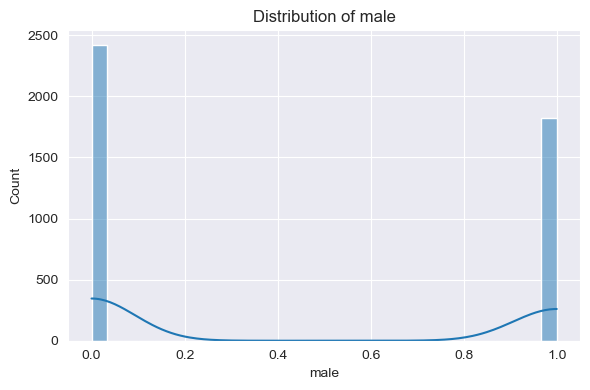

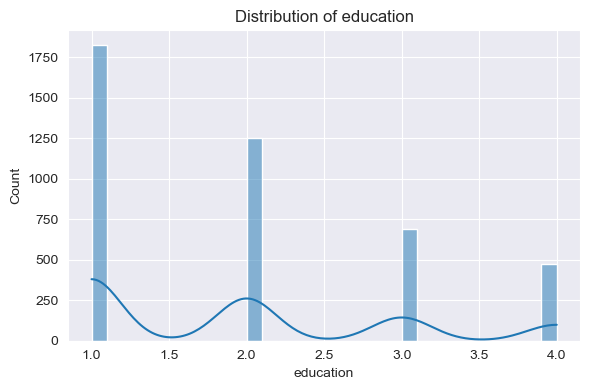

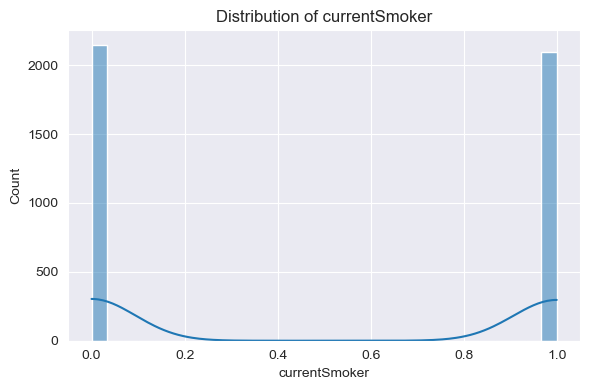

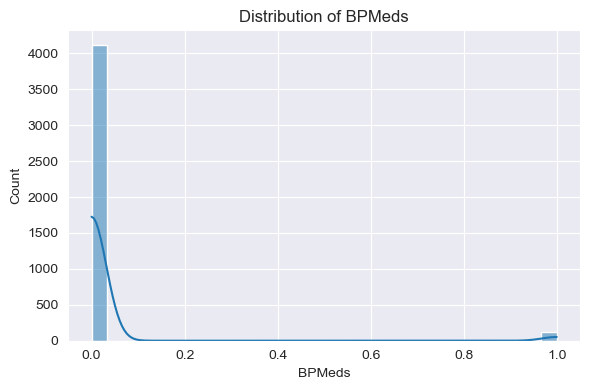

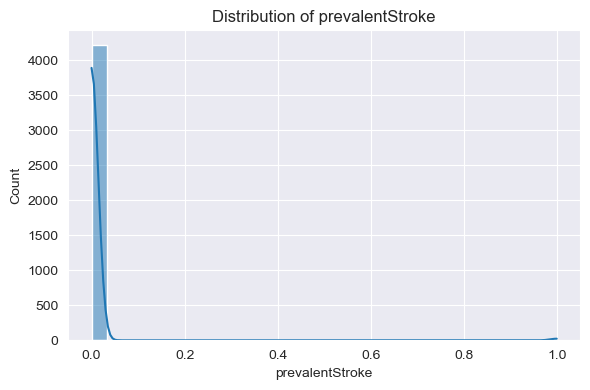

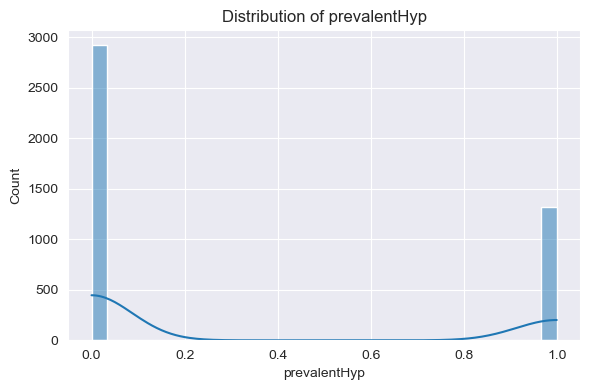

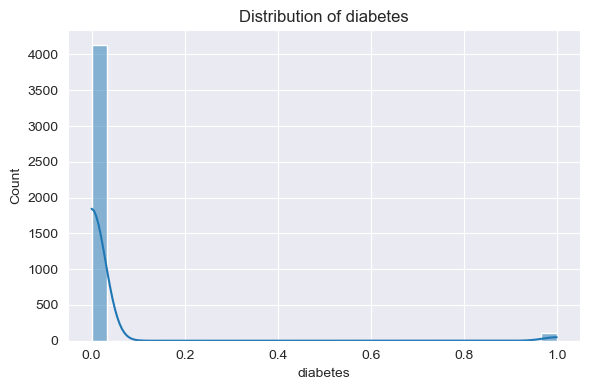

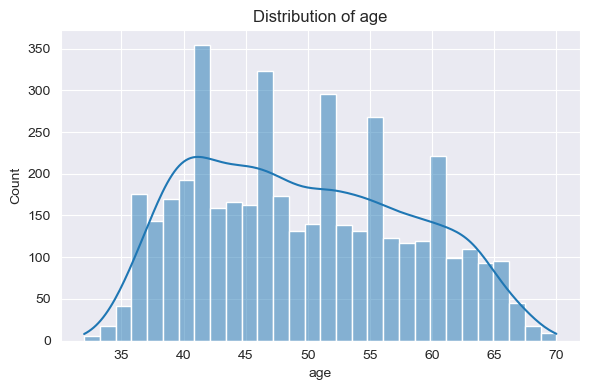

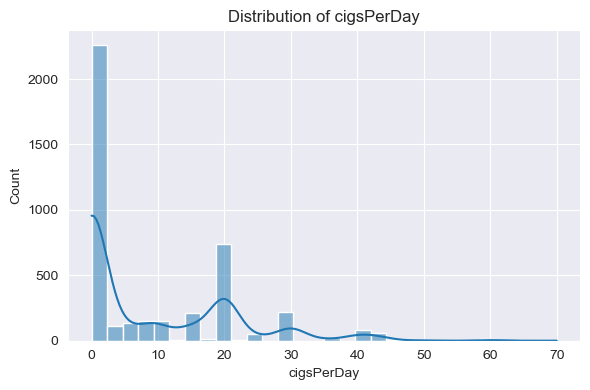

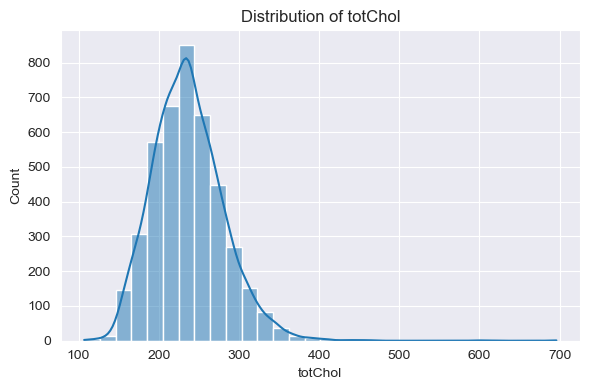

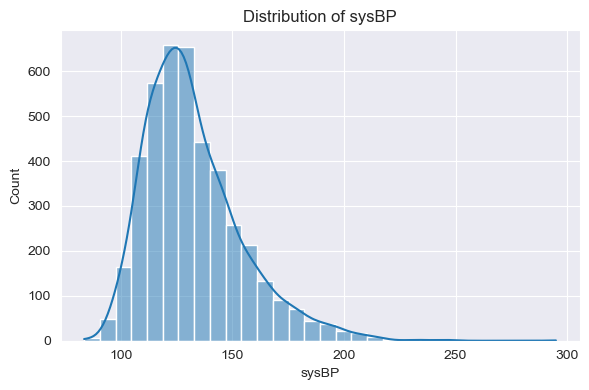

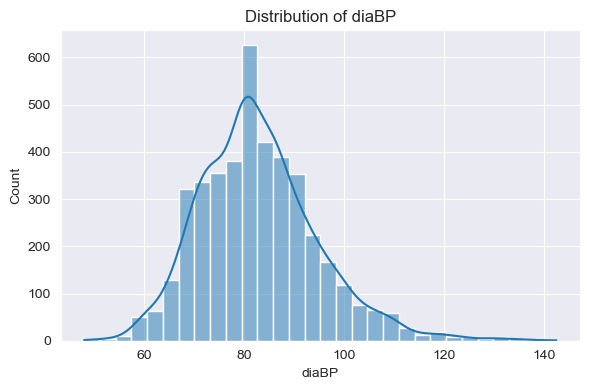

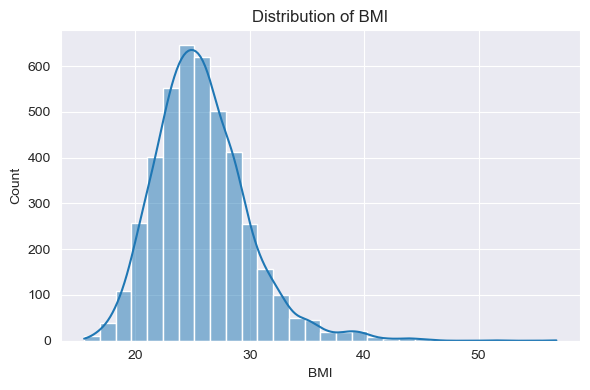

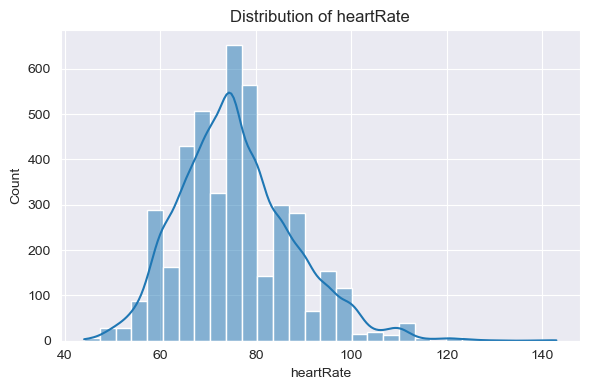

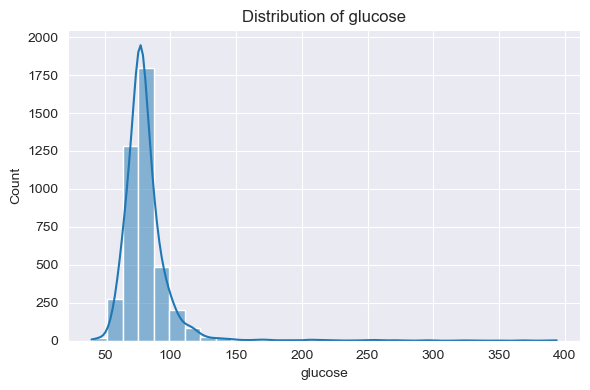

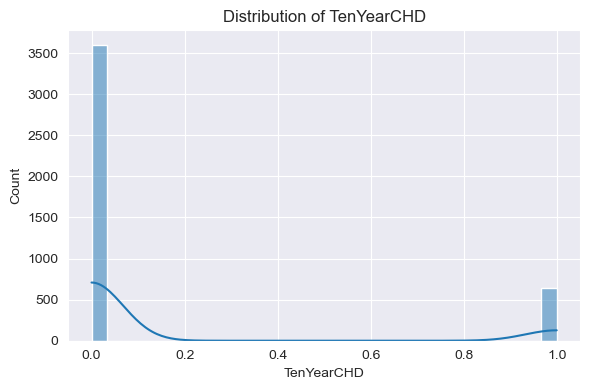

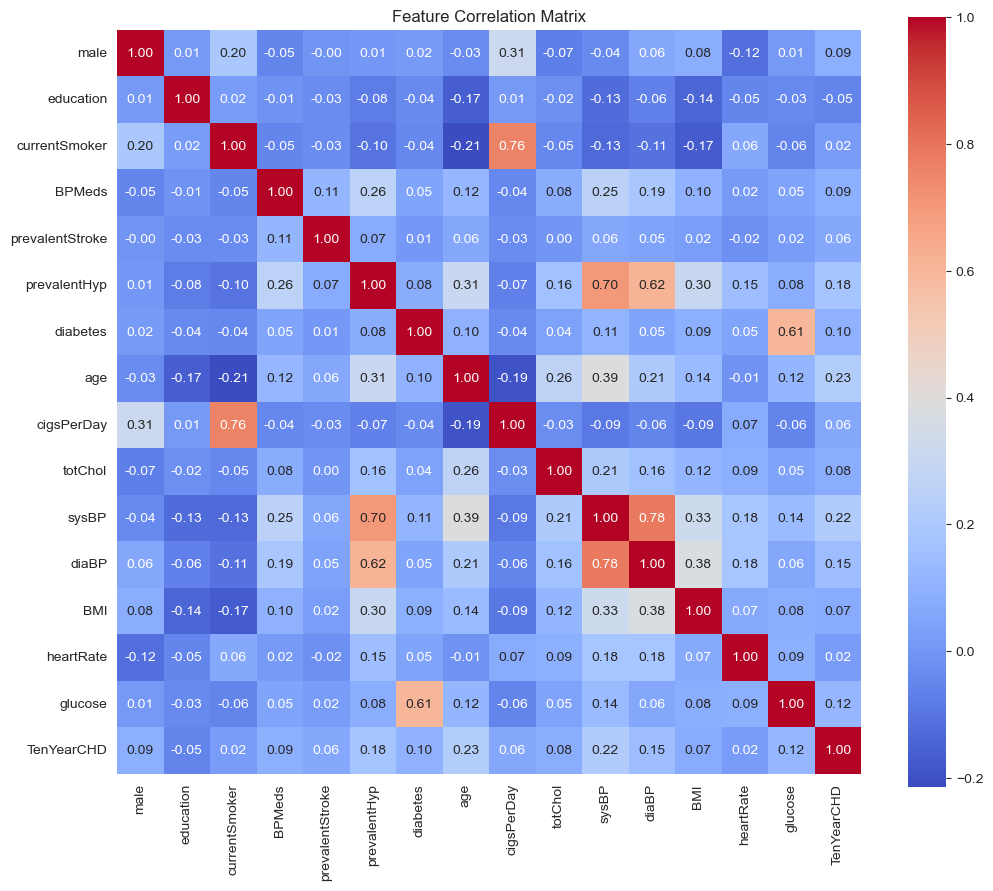

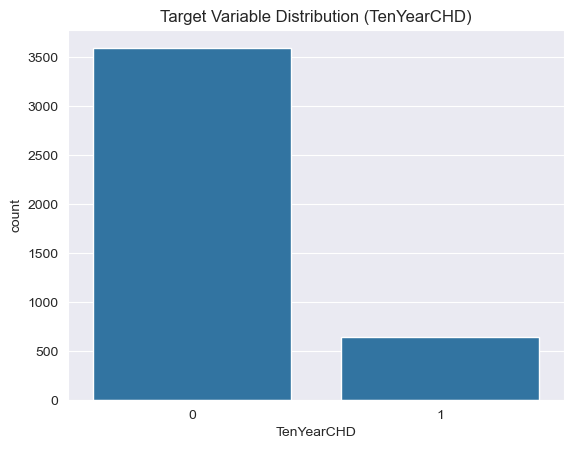

Saving cleaned dataset...
Cleaned dataset saved successfully!


In [9]:
# --- Improved Framingham Data Preprocessing Notebook ---

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

# 1. Load dataset
print("Loading dataset...")
df = pd.read_csv("../data/raw/framingham.csv")
print(f"Initial shape: {df.shape}\n")

# 2. Check for duplicates
print("Checking for duplicates...")
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
if duplicates > 0:
    df = df.drop_duplicates()
    print(f"Dropped duplicates. New shape: {df.shape}\n")
else:
    print("No duplicates found.\n")

# 3. Check missing values
print("Missing values per column:")
print(df.isnull().sum().sort_values(ascending=False))
print()

# 4. Define feature types
categorical_features = ['male', 'education', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']
continuous_features = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
target_column = 'TenYearCHD'

# 5. Detect outliers (flagging only)
print("Outlier Detection (only flagging, not removing):")
outlier_thresholds = {
    'age': (20, 100),
    'cigsPerDay': (0, 60),
    'totChol': (100, 400),
    'sysBP': (80, 250),
    'diaBP': (40, 150),
    'BMI': (10, 60),
    'heartRate': (30, 200),
    'glucose': (50, 300)
}

for feature, (low, high) in outlier_thresholds.items():
    outliers = df[(df[feature] < low) | (df[feature] > high)][feature]
    n_outliers = outliers.shape[0]
    if n_outliers > 0:
        print(f"{feature}: {n_outliers} outliers outside [{low}, {high}]")
        print(outliers.values)

print()

# 6. Impute missing values
print("Imputing missing values...")
median_imputer = SimpleImputer(strategy='median')
mode_imputer = SimpleImputer(strategy='most_frequent')

# Separate features
X_cat = df[categorical_features]
X_cont = df[continuous_features]

# Fit imputers and transform
X_cat_imputed = pd.DataFrame(mode_imputer.fit_transform(X_cat), columns=categorical_features)
X_cont_imputed = pd.DataFrame(median_imputer.fit_transform(X_cont), columns=continuous_features)

# Combine back with target
df_imputed = pd.concat([X_cat_imputed, X_cont_imputed, df[[target_column]].reset_index(drop=True)], axis=1)

# 7. Shuffle dataset
print("Shuffling dataset...")
df_cleaned = df_imputed.sample(frac=1, random_state=42).reset_index(drop=True)

print(f"Final cleaned dataset shape: {df_cleaned.shape}\n")

# 8. Overview after cleaning
df_cleaned.info()

# 9. Summary statistics
df_cleaned.describe()

# 10. Plot feature distributions
for col in df_cleaned.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df_cleaned[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.tight_layout()
    plt.show()

# 11. Correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(df_cleaned.corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Feature Correlation Matrix")
plt.savefig("../results/figures/correlation_matrix.png")
plt.show()

# 12. Target variable distribution
sns.countplot(x='TenYearCHD', data=df_cleaned)
plt.title("Target Variable Distribution (TenYearCHD)")
plt.savefig("../results/figures/target_distribution.png")
plt.show()

# 13. Save cleaned dataset
print("Saving cleaned dataset...")
df_cleaned.to_csv("../data/processed/cleaned_framingham.csv", index=False)
print("Cleaned dataset saved successfully!")
